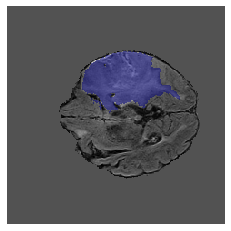

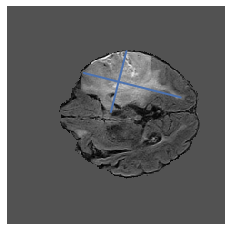

In [13]:
# ground truth segmentation and RANO with a FLAIR channel input as background

import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
from matplotlib import pyplot as plt

example = "Brats18_CBICA_AQT_1"

path1 = "Brats_2018_data/Brats_2018_data/HGG/" + example + "/"+ example + "_whseg_norm.nii.gz"
path2 = "Brats_2018_data/Brats_2018_data/HGG/" + example + "/"+ example + "_whimg_norm.nii.gz"
data = np.load("Brats_2018_data/Brats_2018_data/HGG/" + example + "/" + example + "_RANO.npz")

# slice_val = 80
slice_val = 65
channel_number = 1

img = nib.load(path1)
data1 = img.get_fdata()
data1[:,:,slice_val][ data1[:,:,slice_val]==0 ] = np.nan

img = nib.load(path2)
data2 = img.get_fdata()

plt.imshow(data2[channel_number,:,:,slice_val], cmap='Greys_r', interpolation='nearest')
plt.imshow((data1[:,:,slice_val]), cmap='jet', interpolation='nearest',alpha=0.5)
plt.grid(None) 
plt.axis('off')
plt.show()

#############################################################################################
#                                   segmentation ^ RANO v                                   #
#############################################################################################

lst = data.files
for item in lst:
    data_in = data[item][:,slice_val]

plt.grid(False)
plt.imshow(data2[channel_number,:,:,slice_val], cmap='Greys_r', interpolation='nearest')
plt.grid(None) 
plt.axis('off')

D1 = np.asarray([[data_in[1],data_in[3]],[data_in[0],data_in[2]]]) 
D2 = np.asarray([[data_in[5],data_in[7]],[data_in[4],data_in[6]]]) 

plt.plot(D1[0, :], D1[1, :], lw=2, c='b',label='_nolegend_')
plt.plot(D2[0, :], D2[1, :], lw=2, c='b',label='Prediction')

plt.show()


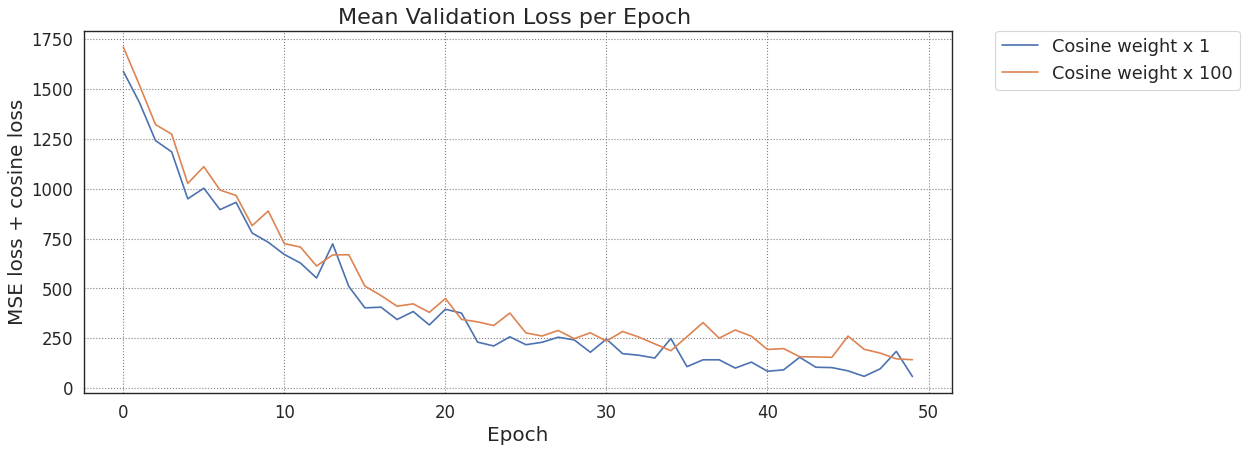

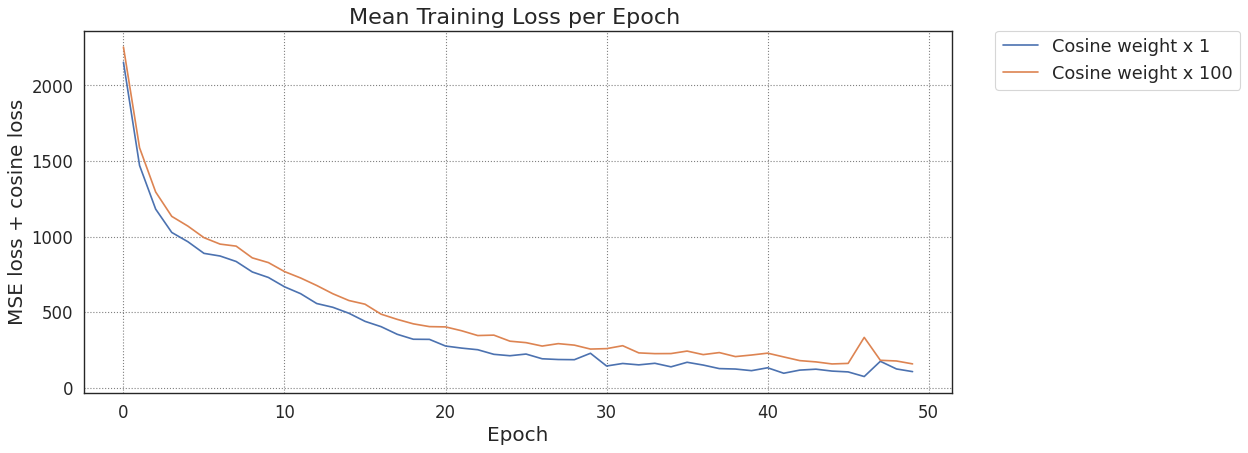

In [62]:
# RANO output loss for both training and validation - over differing penalty types

from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["Unet_H16_M14_CO1_R3_main_data_input_4","Unet_H16_M14_CO100_R3_main_data_input_4"]
legend_names = ["Cosine weight x 1", "Cosine weight x 100"]

output_type = ["validation_loss","training_loss"]
output_axis = ["MSE loss + cosine loss","MSE loss + cosine loss"]
output_title = ["Validation Loss","Training Loss"]
second_out = ["Validation_loss","Training_loss"]

loss_0 = []
loss_Nan_0 = []

for c in range(len(output_type)):
    figure(figsize=(14, 6), dpi=80)
    ax = plt.subplot()
    for s in range(len(input_names)):
        for i in range(50):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

    plt.title("Mean " + output_title[c] + " per Epoch ",fontsize=20)
    ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
    plt.xlabel("Epoch",fontsize=18)
    plt.ylabel(ylabel=output_axis[c],fontsize=18)
    plt.grid()
    plt.show()    

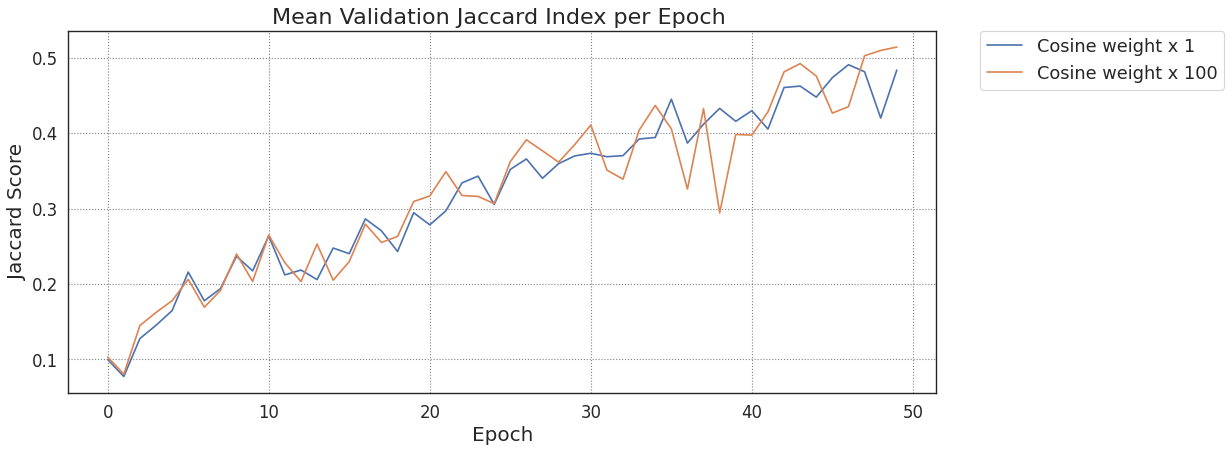

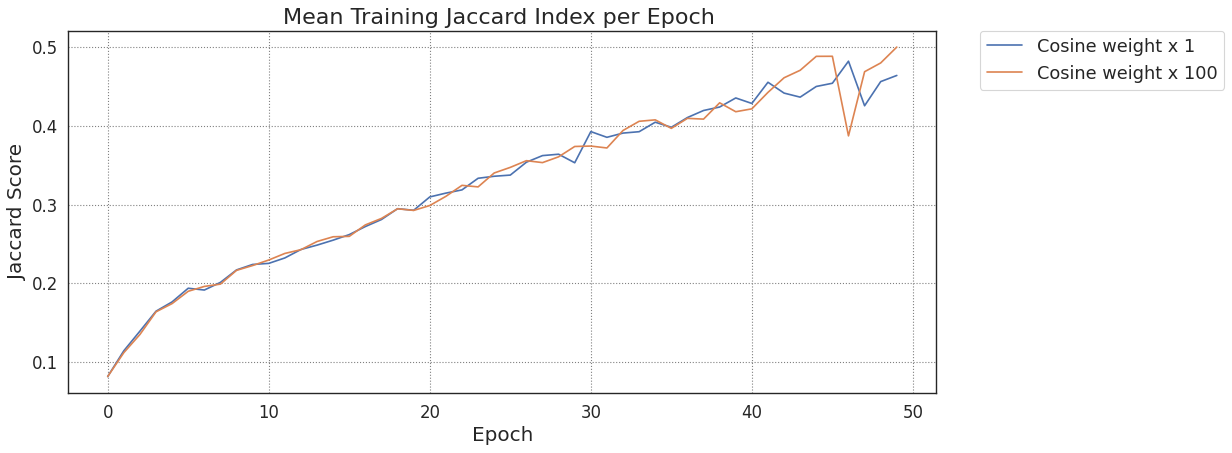

In [64]:
# RANO output Jaccard score for both training and validation - over differing penalty types
# RANO output loss for both training and validation - over differing penalty types

from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["Unet_H16_M14_CO1_R3_main_data_input_4","Unet_H16_M14_CO100_R3_main_data_input_4"]
legend_names = ["Cosine weight x 1", "Cosine weight x 100"]

output_type = ["validation_jaccard_index","jaccard_index"]
output_axis = ["Jaccard Score","Jaccard Score"]
output_title = ["Validation Jaccard Index","Training Jaccard Index"]
second_out = ["Validation_Jaccard","Training_Jaccard"]

loss_0 = []
loss_Nan_0 = []

for c in range(len(output_type)):
    figure(figsize=(14, 6), dpi=80)
    ax = plt.subplot()
    
    for s in range(len(input_names)):
        for i in range(50):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]
        
        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []
        
    
    plt.title("Mean " + output_title[c] + " per Epoch ",fontsize=20)
    ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
    plt.xlabel("Epoch",fontsize=18)
    plt.ylabel(ylabel=output_axis[c],fontsize=18)
    plt.grid()
    plt.show()    

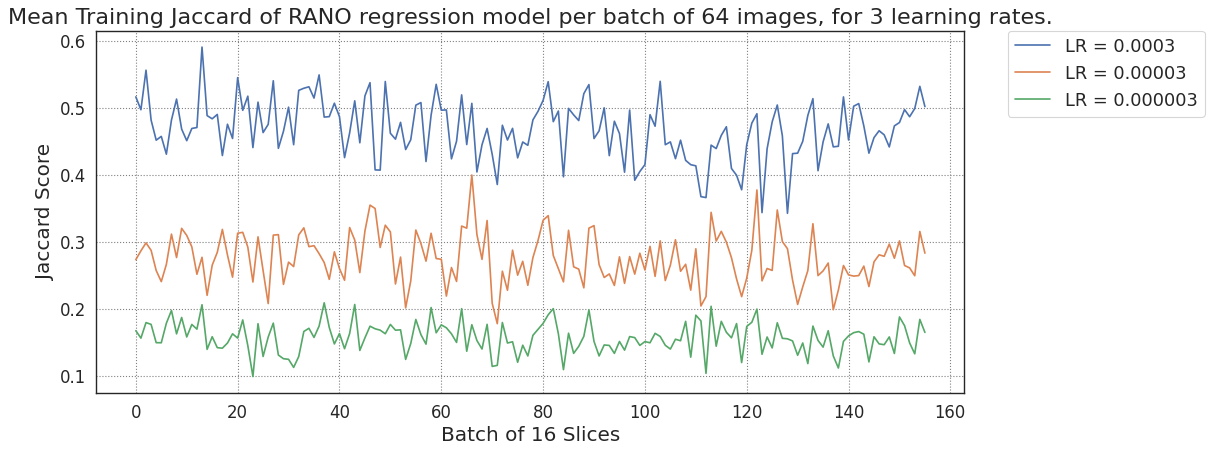

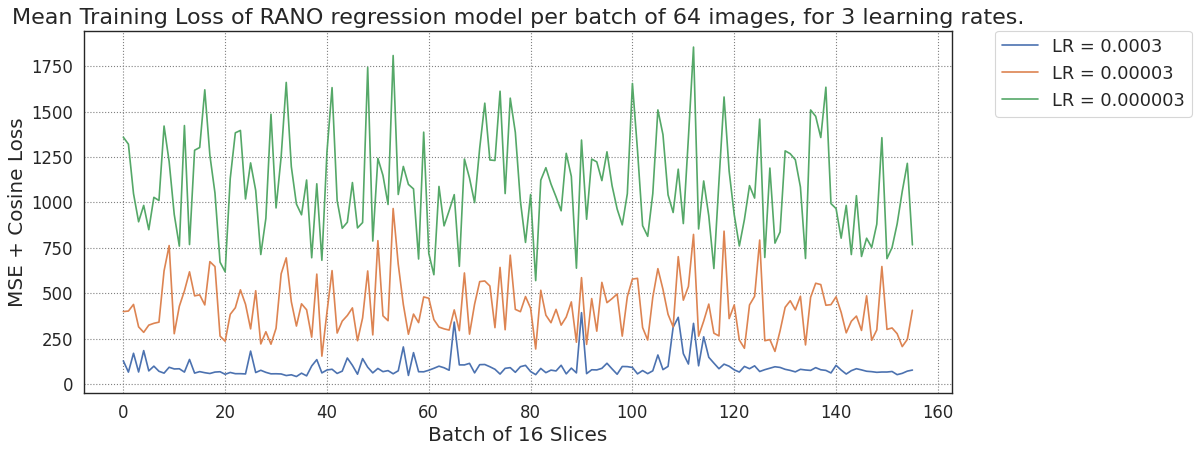

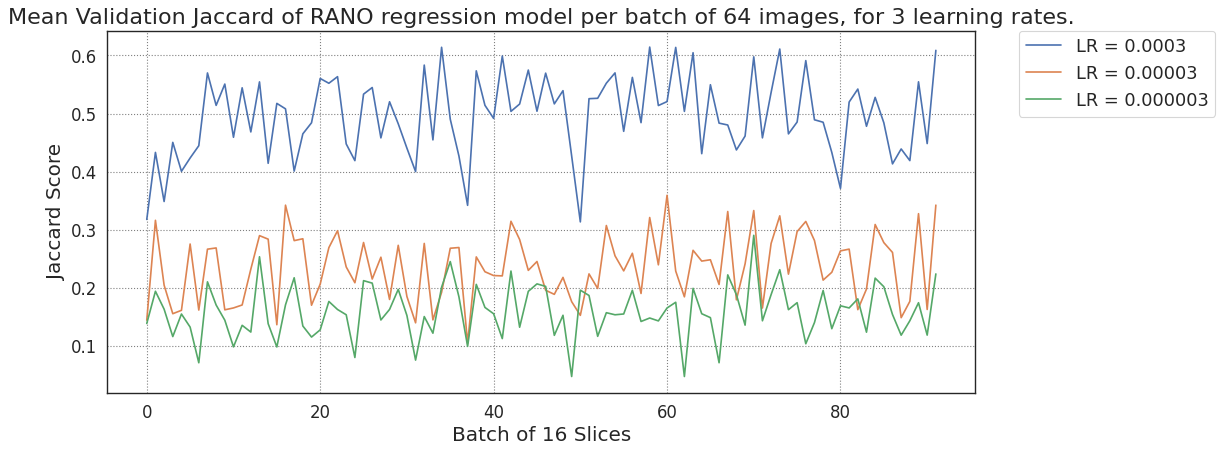

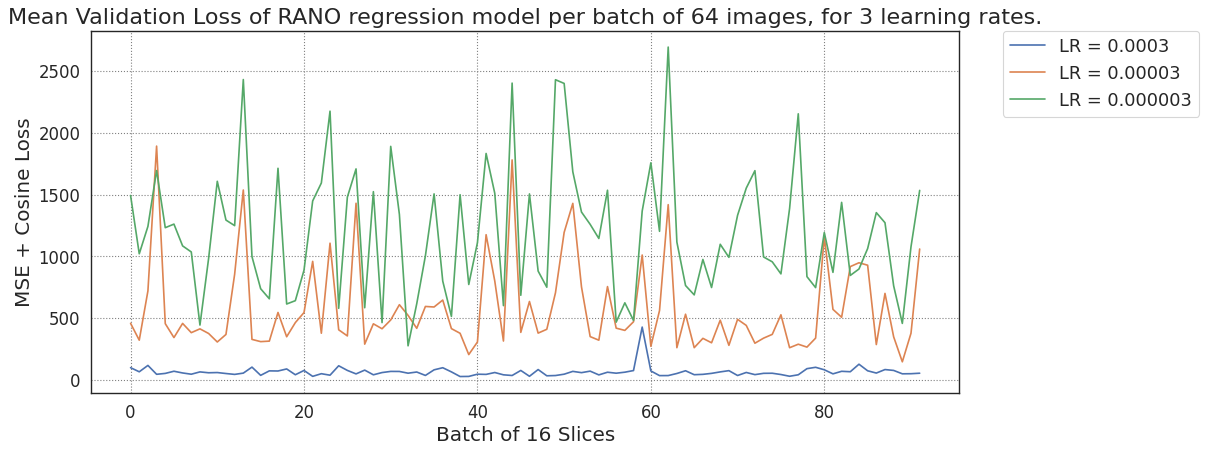

In [15]:
# RANO output for 3 different learning rates at orders of magnitude

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

loss_0 = []
loss_1 = []
loss_2 = []
loss_Nan_0 = []
x = 0
loss = []

l_s = ["loss","dice"]
output_l_s = ["Training Jaccard","Training Loss","Validation Jaccard","Validation Loss"]
b_d = ["using BCE loss", "using dice loss"]
train_val = [""]

values = ["/Training_Jaccard/epoch_49jaccard_index.csv",
          "/Training_loss/epoch_49training_loss.csv",
          "/Validation_Jaccard/epoch_49validation_jaccard_index.csv",
          "/Validation_loss/epoch_49validation_loss.csv"]

input_val = ["Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_0003" ,
             "Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_00003" ,
             "Checkpoints_RANO/Unet_H16_M14_CO0_R3_main_data_0_000003"]
label_val = ["LR = 0.0003",
             "LR = 0.00003",
             "LR = 0.000003"]
yaxis = ["Jaccard Score", "MSE + Cosine Loss"]

for i in range(len(values)):
    figure(figsize=(14, 6), dpi=80)
    for s in range(len(input_val)):

        loss_0 = np.genfromtxt(input_val[s]+values[i],delimiter=",")
        if i == 0:
            # for some reason there are 5 missing values here, will need to check why this is occuring
            loss_0 = np.append(loss_0,[np.nan,np.nan,np.nan,np.nan,np.nan])
            loss_0 = np.nanmean(loss_0[0:(len(loss_0))].reshape(-1, 16), axis=1)
            loss_0 = np.nanmean(loss_0.reshape(-1, 4), axis=1)
        if i == 1:
            loss_0 = np.nanmean(loss_0.reshape(-1, 4), axis=1)
        if i == 2:

            loss_0 = np.nanmean(loss_0[0:(len(loss_0))-8].reshape(-1, 16), axis=1)

        plt.grid()
        plt.plot(range(len(loss_0[1:])),loss_0[1:])
        loss = []
        loss_0 = []
        loss_1 = []
        loss_2 = []
        loss_Nan_0 = []

    plt.title("Mean " + output_l_s[i] + " of RANO regression model per batch of 64 images, for 3 learning rates."
              , fontsize=20)
    plt.legend(label_val,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0
               , fontsize=16)
    plt.xlabel("Batch of 16 Slices",fontsize=18)
    plt.ylabel(yaxis[i%2],fontsize=18)
    plt.show()


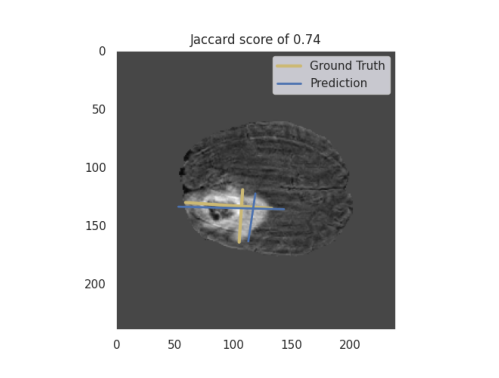

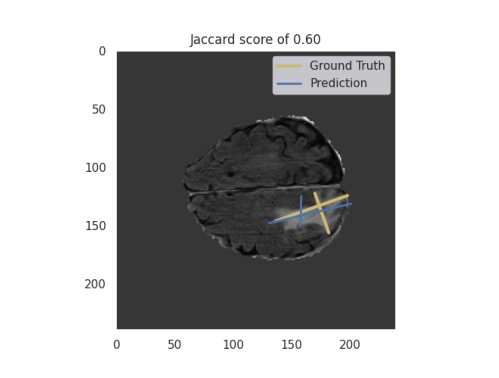

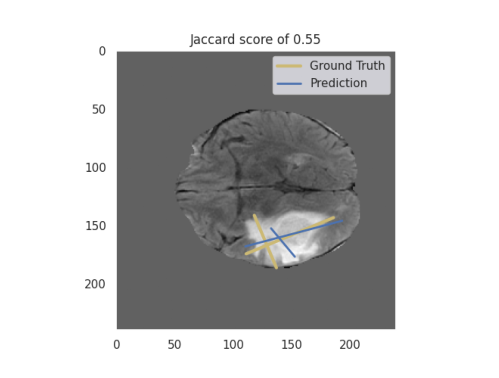

In [14]:
# RANO predictions overlaying ground truth for 3 progressively higher quality examples

from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# RANO jaccard score of 0.73
image_1 = "Predictions_RANO_test/newtest_maintest/Unet_H16_M14_CO100_R3_main_data_input_4/IMAGE/HGG/Brats18_TCIA01_411_1/Slice_101_0.7368679430535101.png"

# RANO jaccard score of 0.59
image_2 = "Predictions_RANO_test/newtest_maintest/Unet_H16_M14_CO100_R3_main_data_input_4/IMAGE/HGG/Brats18_CBICA_BHB_1/Slice_102_0.5970836531082118.png"

# RANO jaccard score of 0.54
image_3 = "Predictions_RANO_test/newtest_maintest/Unet_H16_M14_CO100_R3_main_data_input_4/IMAGE/HGG/Brats18_CBICA_ABB_1/Slice_43_0.5464891041162228.png"

show_images = [image_1, image_2, image_3]

for i in range(len(show_images)):
    figure(figsize=(14, 6), dpi=80)
    img = mpimg.imread(show_images[i])
    imgplot = plt.imshow(img)
    plt.grid(False)
    plt.axis('off')
    plt.show()

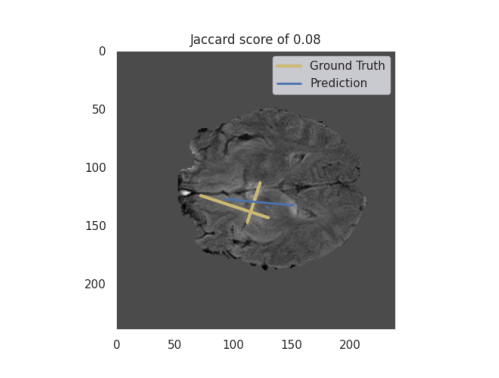

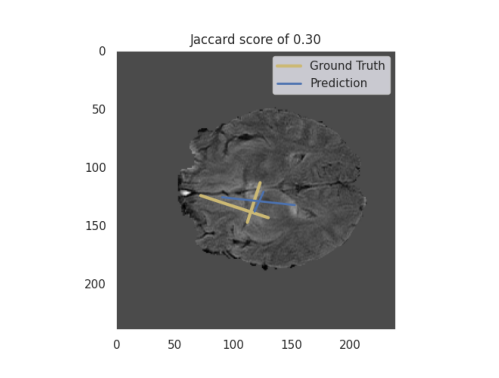

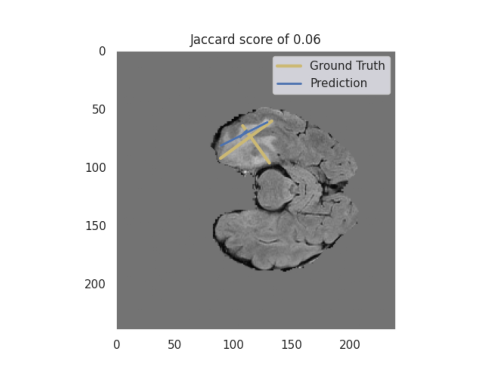

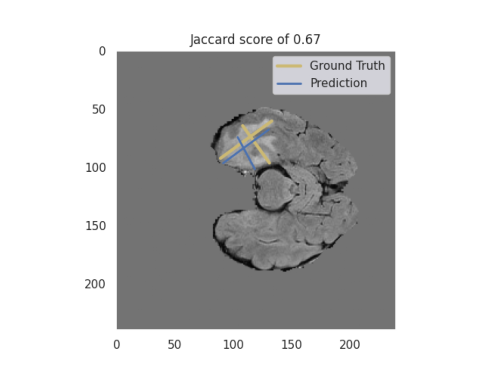

In [7]:
# RANO predictions overlaying ground truth for 2 different models for qualitative output improvements - 2 examples

from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image_1 = "Predictions_RANO_test/newtest_maintest/Unet_H16_M14_CO1_R3_main_data_input_4/IMAGE/HGG/Brats18_TCIA02_290_1/Slice_62_0.0755891507336594.png"
image_2 = "Predictions_RANO_test/newtest_maintest/Unet_H16_M14_CO100_R3_main_data_input_4/IMAGE/HGG/Brats18_TCIA02_290_1/Slice_62_0.2998411437648928.png"

image_3 = "Predictions_RANO_test/newtest_maintest/Unet_H16_M14_CO1_R3_main_data_input_4/IMAGE/HGG/Brats18_CBICA_AUN_1/Slice_35_0.05516596540439458.png"
image_4 = "Predictions_RANO_test/newtest_maintest/Unet_H16_M14_CO100_R3_main_data_input_4/IMAGE/HGG/Brats18_CBICA_AUN_1/Slice_35_0.6747437092264679.png"

show_images = [image_1, image_2, image_3, image_4]

for i in range(len(show_images)):
    plt.figure(figsize=(14, 6), dpi=80)
    img = mpimg.imread(show_images[i])
    imgplot = plt.imshow(img)
    plt.grid(False)
    plt.axis('off')
    plt.show()

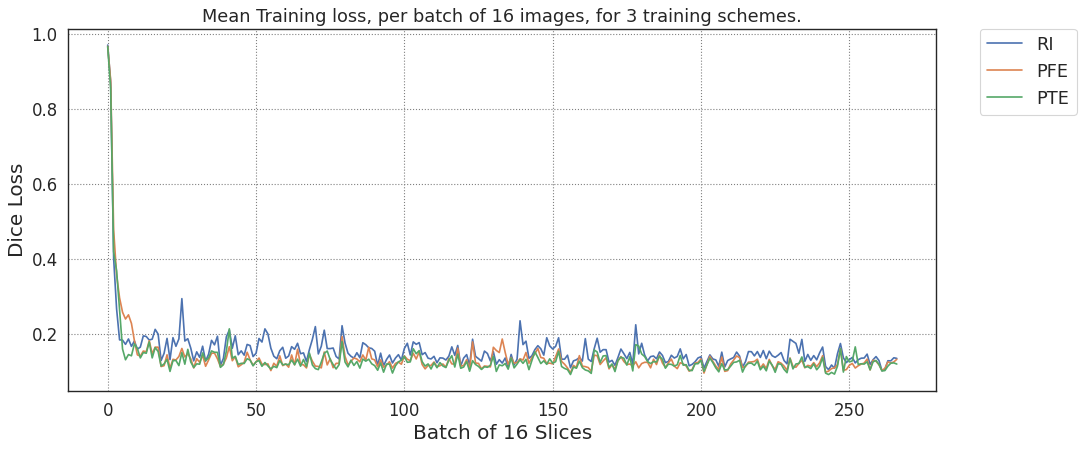

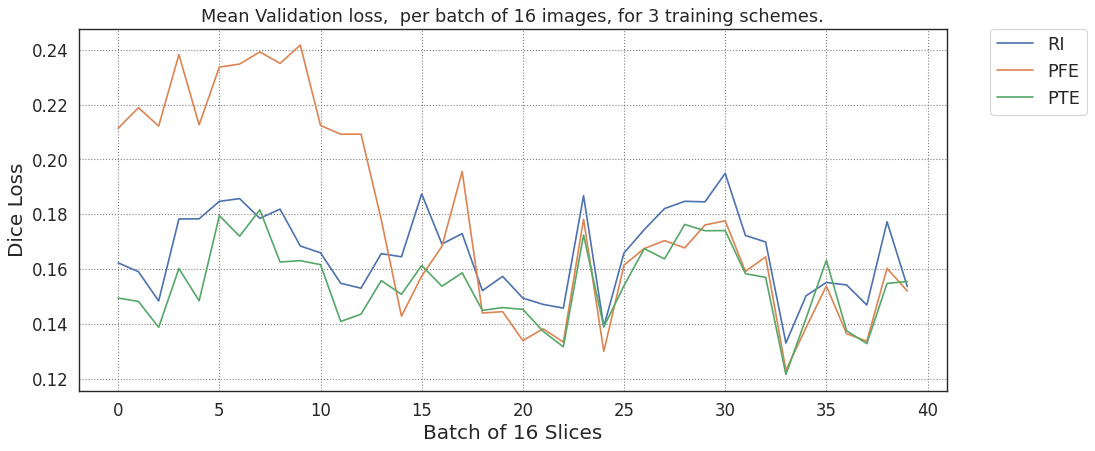

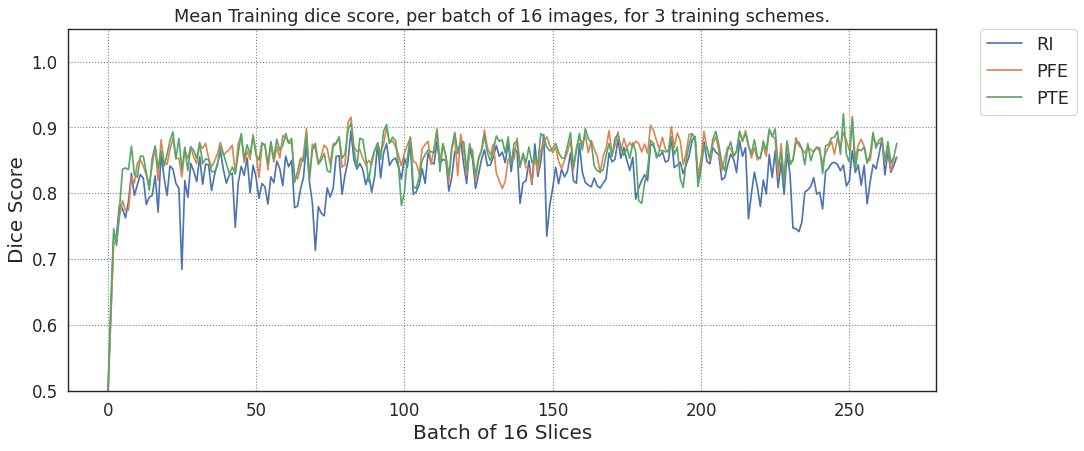

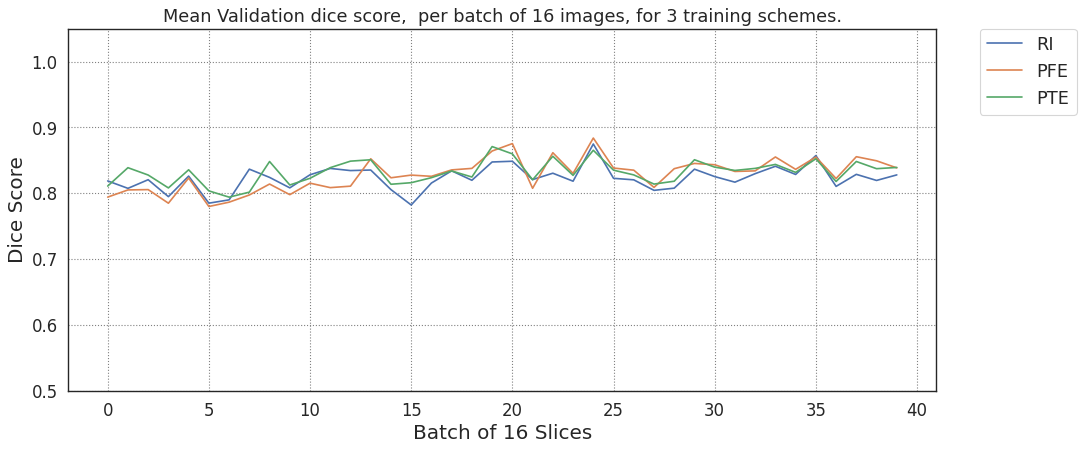

In [5]:
# Segmentaiton training loss plot for 3 different models = RI, PFE, PTE
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

loss_0 = []
loss_1 = []
loss_2 = []
loss_Nan_0 = []
x = 0
loss = []

l_s = ["loss","dice"]
output_l_s = ["loss, ","dice score, "]
b_d = ["using BCE loss", "using dice loss"]
train_val = [""]
yaxis = ["Dice Loss","Dice Score"]

for switch_loss_dice in range(2):
    for switch in range(1):
        if switch == 0:
            input_val = ["Checkpoints/split_data_experiments/1_Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main" ,
                         "Checkpoints/split_data_experiments/1_Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main" ,
                         "Checkpoints/split_data_experiments/1_Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main"]
            label_val = ["RI",
                         "PFE",
                         "PTE"]
        if switch == 1:
            input_val = ["Checkpoints/split_data_experiments/1_Full_model_MK6_H16_RI_CO100_R3_lr_0003_dice_main",
                         "Checkpoints/split_data_experiments/1_Full_model_MK6_H16_PFE_CO100_R3_lr_0003_dice_main",
                         "Checkpoints/split_data_experiments/1_Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main"]
            label_val = ["RI",
                         "PFE",
                         "PTE"]

        figure(figsize=(14, 6), dpi=80)
        
        for s in range(len(input_val)):

            loss_0 = np.genfromtxt(input_val[s]+"/epoch_0training_"+l_s[switch_loss_dice]+".csv")
            loss_1 = np.genfromtxt(input_val[s]+"/epoch_1training_"+l_s[switch_loss_dice]+".csv")
            loss_2 = np.genfromtxt(input_val[s]+"/epoch_2training_"+l_s[switch_loss_dice]+".csv")

            for i in loss_0:
                loss = np.append(loss,i)
            for i in loss_1:
                loss = np.append(loss,i)
            for i in loss_2:
                loss = np.append(loss,i)

            for i in range(len(loss)):
                x = x + loss[i]
                if i % 16 == 0:
                    loss_Nan_0 = np.append(loss_Nan_0, x / 16)
                    x = 0
            plt.grid()
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:])
            loss = []
            loss_0 = []
            loss_1 = []
            loss_2 = []
            loss_Nan_0 = []
        
        plt.title("Mean Training " + output_l_s[switch_loss_dice] + "per batch of 16 images, for 3 training schemes.", fontsize=16)
        if switch_loss_dice == 1:
            plt.ylim([0.5,1.05]) # this controls the dice score plot
        plt.legend(label_val,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
        plt.xlabel("Batch of 16 Slices", fontsize=18)
        plt.ylabel(yaxis[switch_loss_dice], fontsize=18)
        plt.show()
        figure(figsize=(14, 6), dpi=80)

        for s in range(len(input_val)):

            loss_0 = np.genfromtxt(input_val[s]+"/epoch_0validation_"+l_s[switch_loss_dice]+".csv")
            loss_1 = np.genfromtxt(input_val[s]+"/epoch_1validation_"+l_s[switch_loss_dice]+".csv")
            loss_2 = np.genfromtxt(input_val[s]+"/epoch_2validation_"+l_s[switch_loss_dice]+".csv")

            for i in loss_0:
                loss = np.append(loss,i)
            for i in loss_1:
                loss = np.append(loss,i)
            for i in loss_2:
                loss = np.append(loss,i)

            for i in range(len(loss)):
                x = x + loss[i]
                if i % 16 == 0:
                    loss_Nan_0 = np.append(loss_Nan_0, x / 16)
                    x = 0

            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:])
            loss = []
            loss_0 = []
            loss_1 = []
            loss_2 = []
            loss_Nan_0 = []
        plt.title("Mean Validation " + output_l_s[switch_loss_dice] + " per batch of 16 images, for 3 training schemes.", fontsize=16)
        if switch_loss_dice == 1:
            plt.ylim([0.5,1.05]) # this controls the dice score plot
        plt.legend(label_val,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
        plt.xlabel("Batch of 16 Slices", fontsize=18)
        plt.ylabel(yaxis[switch_loss_dice], fontsize=18)
        plt.grid()
        plt.show()

Truth


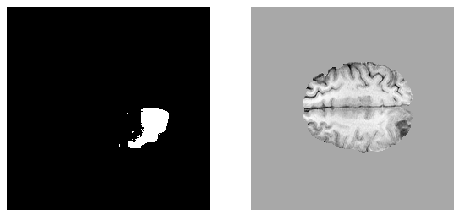

RI


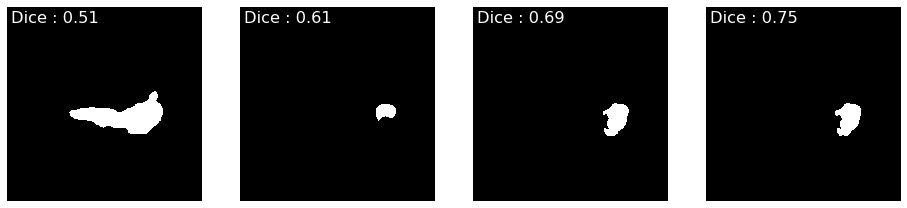

PFE


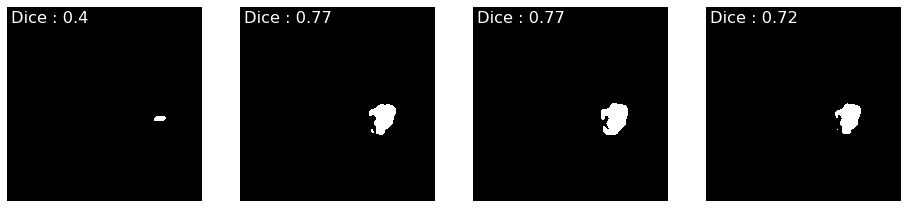

PTE


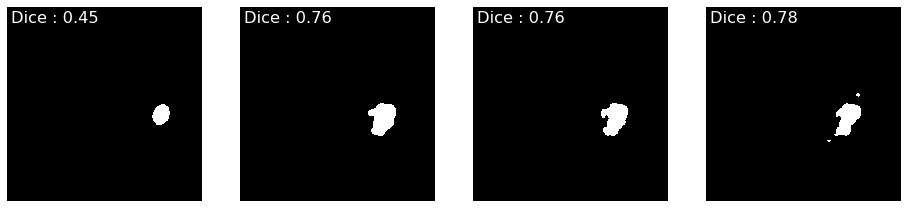

In [70]:
# Segmentation qualitative outputs for RI, PFE and PTE examples
from pylab import figure, text, scatter, show
from nibabel.testing import data_path
from matplotlib import pyplot as plt
import nibabel as nib
import numpy as np
import os
import csv

#path1 = "Predictions/MK_5_model_predictions_2/MK_5_base_step_50/HGG_Brats18_CBICA_AUN_1_0_.nii.gz"

input_volume = "Brats18_TCIA10_413_1"
# Brats18_TCIA10_632_1
scheme = ["RI","PFE","PTE"]
batch_list = ["0_50","0_550","1","2"]
slice_num = 110

truth_seg = "Brats_2018_data/Brats_2018_data/LGG/"+input_volume+"/"+input_volume+"_whseg_norm.nii.gz"
truth_vol = "Brats_2018_data/Brats_2018_data/LGG/"+input_volume+"/"+input_volume+"_whimg_norm.nii.gz"
truth = [truth_seg,truth_vol]
fig, ax = plt.subplots(1, 2,figsize=(8, 7))
print("Truth")
for s in range(2):
    img = nib.load(truth[s])
    data = img.get_fdata()
    if s == 0:
        ax[s].imshow(data[:,:,slice_num], cmap='Greys_r', interpolation='nearest')
    else:
        ax[s].imshow(data[0,:,:,slice_num], cmap='Greys_r', interpolation='nearest')
    ax[s].grid(None) 
    ax[s].axis('off')
plt.show()
    
for k in range(len(scheme)):
    print(scheme[k])
    dice_score = [0,0,0,0]
    path1 = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_"+scheme[k]+"_6/step_0_50/"+input_volume+".nii.gz"
    path2 = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_"+scheme[k]+"_6/step_0_550/"+input_volume+".nii.gz"
    path3 = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_"+scheme[k]+"_6/step_1/"+input_volume+".nii.gz"
    path4 = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_"+scheme[k]+"_6/step_2/"+input_volume+".nii.gz"

    for batch in range(len(batch_list)):
        with open("Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_"+scheme[k]+"_6/step_" + batch_list[batch] + "_Dice_predictions.csv", mode='r') as infile:
            reader = csv.reader(infile)
            mydict = dict((rows[0],rows[1]) for rows in reader)
            dice_score[batch] = str(round(float(mydict["/LGG/" + input_volume]),2))

    #get the dice score for each of the examples or figure out how to extract it from the csv
    output_score = [0,0,0,0,0]

    x = [path1,path2,path3,path4]

    fig, ax = plt.subplots(1, 4,figsize=(16, 8))

    for i in range(len(x)):
        img = nib.load(x[i])
        data = img.get_fdata()
        ax[i].imshow(data[:,:,slice_num], cmap='Greys_r', interpolation='nearest')
        ax[i].grid(None) 
        ax[i].axis('off')

        text(0.02, 0.98,"Dice : " + str(dice_score[i]),
            horizontalalignment='left',
            verticalalignment='top',
            transform = ax[i].transAxes,
            color = "white")
    plt.show()

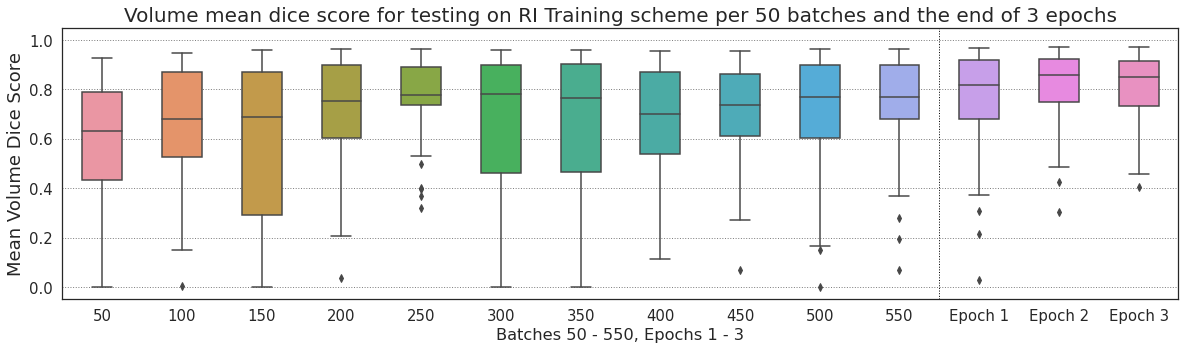

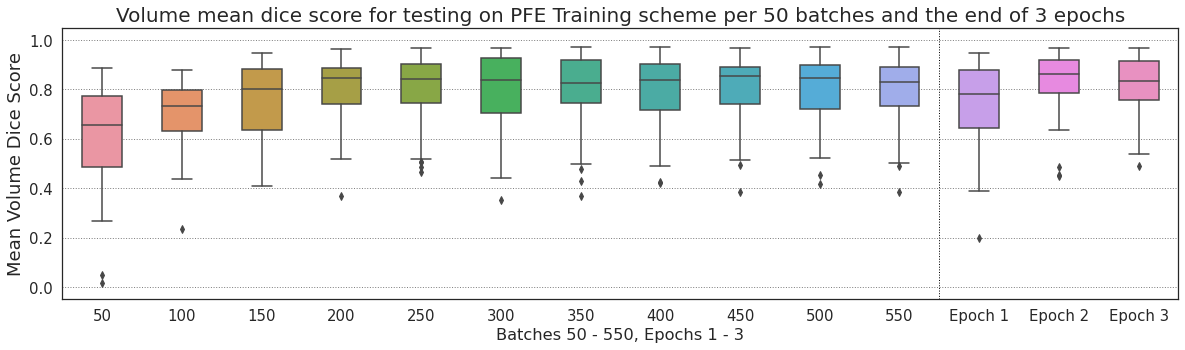

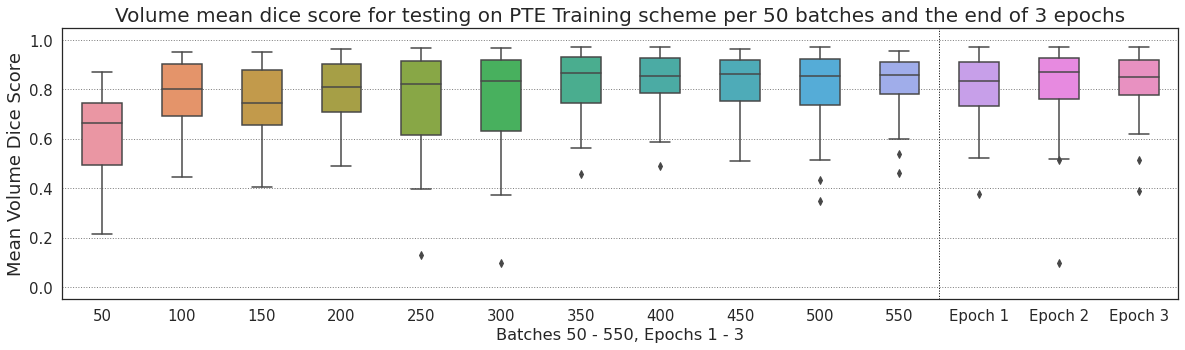

In [3]:
# Segmentation Boxplot progression for RI, PFE and PTE 

from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv  

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

line_plot = []
batch_list = np.linspace(50, 550, num=11)
for training_scheme in ["RI","PFE","PTE"]:
    dice_frame_concat = pd.DataFrame(data=[], columns=range(1)).assign(Data="Base Model")
    plt.figure(figsize=(20,5))
    for batch in range(len(batch_list)+3):
        if batch < len(batch_list):
            with open("Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_"+training_scheme+"_6/step_0_"+str(int(batch_list[batch]))+"_Dice_predictions.csv", mode='r') as infile:
                reader = csv.reader(infile)
                mydict = dict((rows[0],rows[1]) for rows in reader)

            list_U = []
            for key,val in mydict.items():
                list_U.append(float(val))

            dice_frame = pd.DataFrame(data=list_U, columns=range(1)).assign(Data=str(int(batch_list[batch])))
            dice_frame_concat = pd.concat([dice_frame_concat,dice_frame])
            dice_output = pd.melt(dice_frame_concat, id_vars=['Data'])

        if batch >= len(batch_list):
            
            with open("Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_"+training_scheme+"_6/step_"+str(int(batch - len(batch_list)))+"_Dice_predictions.csv", mode='r') as infile:
                reader = csv.reader(infile)
                mydict = dict((rows[0],rows[1]) for rows in reader)

            list_U = []
            for key,val in mydict.items():
                list_U.append(float(val))

            dice_frame = pd.DataFrame(data=list_U, columns=range(1)).assign(Data="Epoch " + str(int(batch - len(batch_list))+1))
            dice_frame_concat = pd.concat([dice_frame_concat,dice_frame])
            dice_output = pd.melt(dice_frame_concat, id_vars=['Data'])
    plt.grid()
    ax = sns.boxplot(x="Data", y="value", data=dice_output,width=0.5)
    
    plt.title("Volume mean dice score for testing on " + training_scheme + " Training scheme per 50 batches and the end of 3 epochs"        ,fontsize=20)
    plt.ylim([-0.05,1.05])
    plt.ylabel("Mean Volume Dice Score",fontsize=18)
    np.set_printoptions(precision=3)
    ax.xaxis.set_minor_locator(MultipleLocator(10.5))
    ax.xaxis.grid(True, which='minor', color='black', lw=1)
    plt.xlabel("Batches 50 - 550, Epochs 1 - 3")
    
    plt.show()

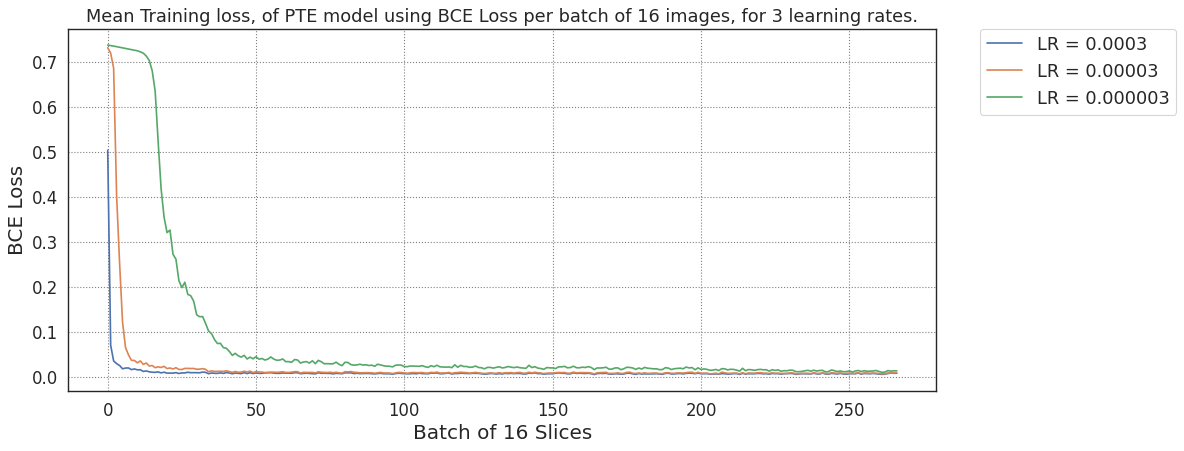

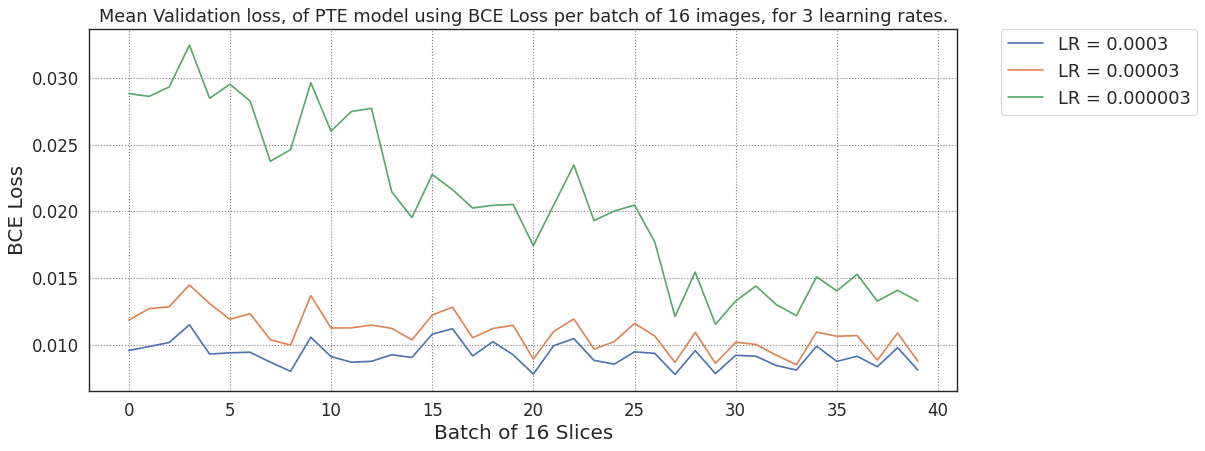

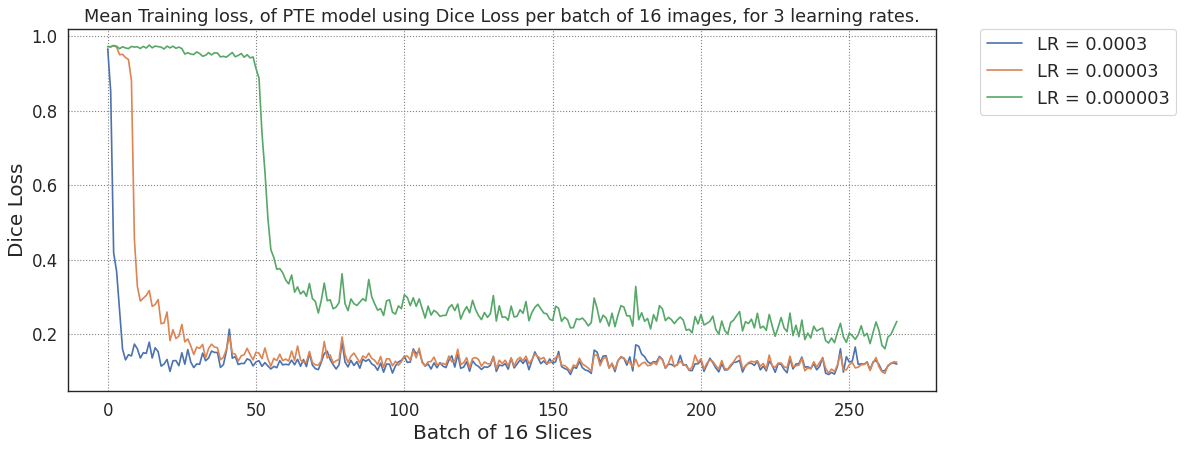

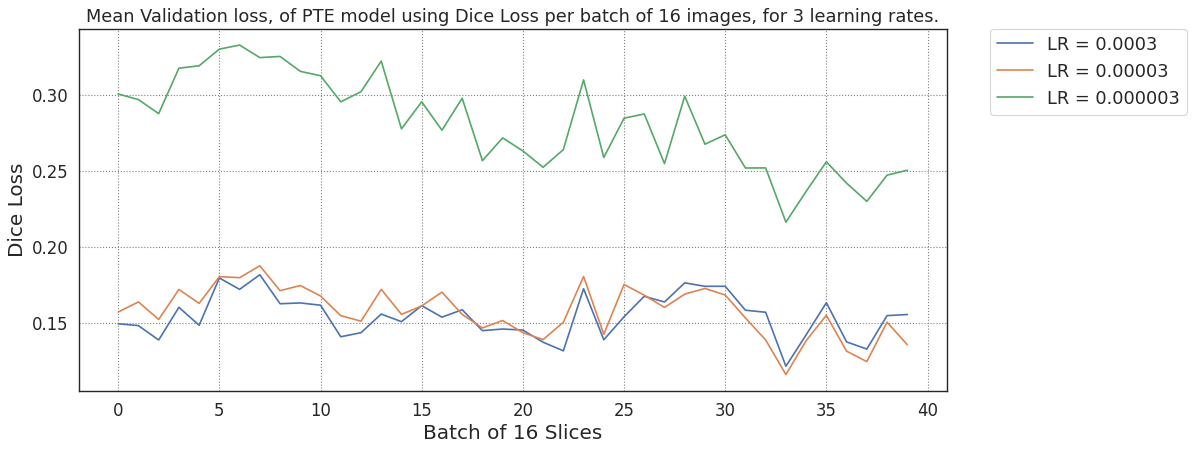

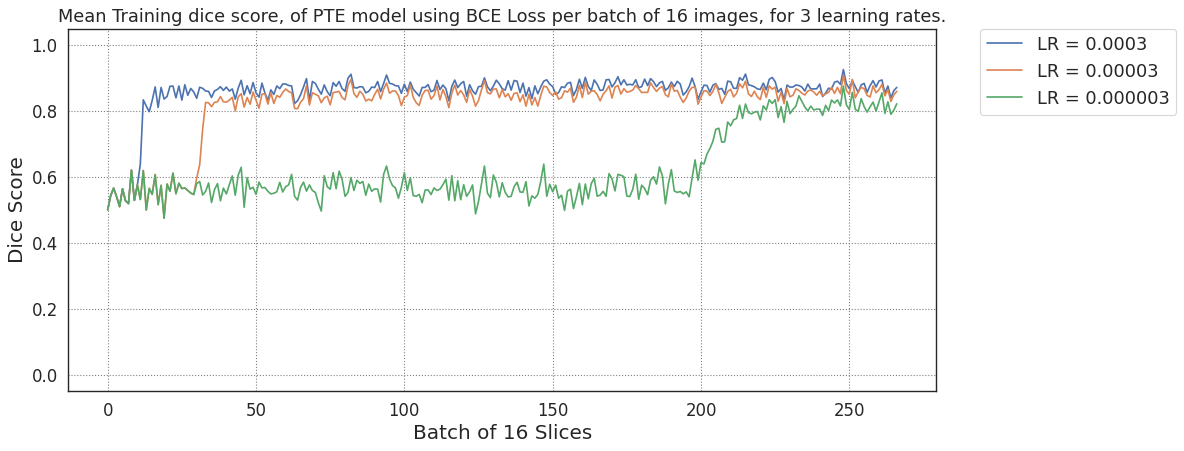

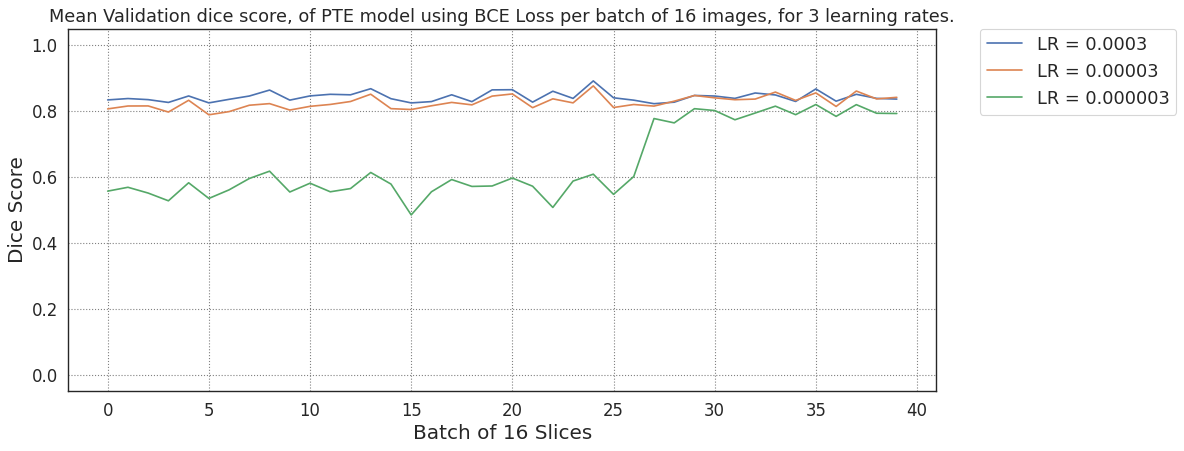

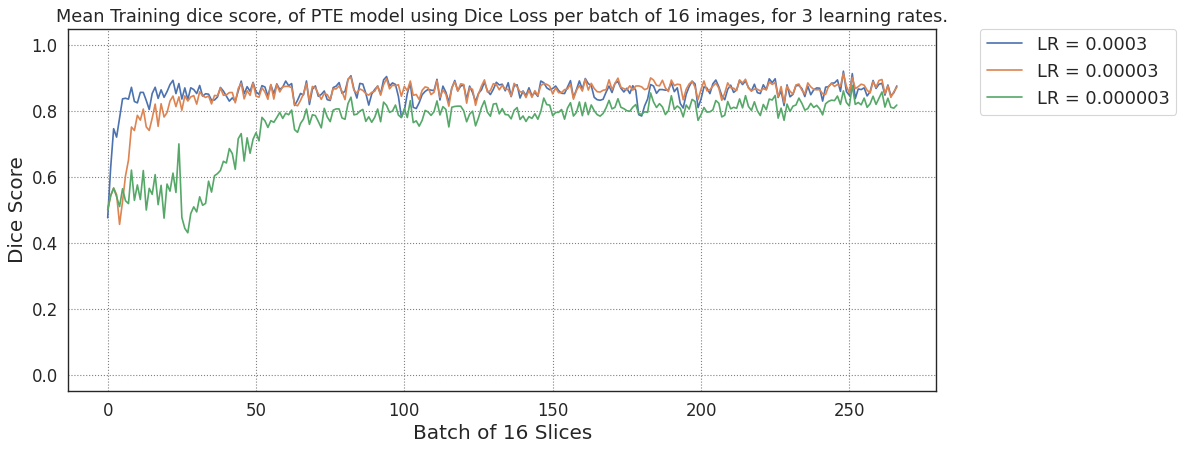

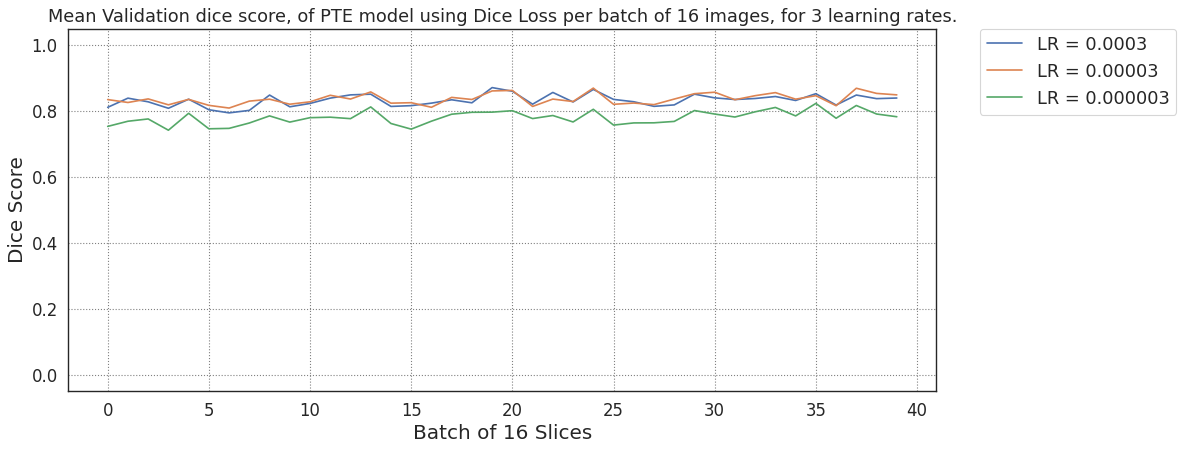

In [87]:
# Segmentation PTE output for 3 different learning rates at orders of magnitude

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

loss_0 = []
loss_1 = []
loss_2 = []
loss_Nan_0 = []
x = 0
loss = []

l_s = ["loss","dice"]
output_l_s = ["loss, ","dice score, "]
b_d = ["BCE Loss", "Dice Loss"]
train_val = [""]
yaxis = ["Dice Loss","Dice Score"]

for switch_loss_dice in range(2):
    for switch in range(2):
        if switch == 0:
            input_val = ["Checkpoints/split_data_experiments/Full_model_MK6_H16_PTE_CO100_R3_lr_0003_bce_main_22072022" ,
                         "Checkpoints/split_data_experiments/Full_model_MK6_H16_PTE_CO100_R3_lr_00003_bce_main_22072022" ,
                         "Checkpoints/split_data_experiments/Full_model_MK6_H16_PTE_CO100_R3_lr_000003_bce_main_22072022"]
            label_val = ["LR = 0.0003",
                         "LR = 0.00003",
                         "LR = 0.000003"]
        if switch == 1:
            input_val = ["Checkpoints/split_data_experiments/1_Full_model_MK6_H16_PTE_CO100_R3_lr_0003_dice_main",
                         "Checkpoints/split_data_experiments/Full_model_MK6_H16_PTE_CO100_R3_lr_00003_dice_main_21072022",
                         "Checkpoints/split_data_experiments/Full_model_MK6_H16_PTE_CO100_R3_lr_000003_dice_main_22072022"]
            label_val = ["LR = 0.0003",
                         "LR = 0.00003",
                         "LR = 0.000003"]
        figure(figsize=(14, 6), dpi=80)    
        plt.grid()
        
        for s in range(len(input_val)):

            loss_0 = np.genfromtxt(input_val[s]+"/epoch_0training_"+l_s[switch_loss_dice]+".csv")
            loss_1 = np.genfromtxt(input_val[s]+"/epoch_1training_"+l_s[switch_loss_dice]+".csv")
            loss_2 = np.genfromtxt(input_val[s]+"/epoch_2training_"+l_s[switch_loss_dice]+".csv")

            for i in loss_0:
                loss = np.append(loss,i)
            for i in loss_1:
                loss = np.append(loss,i)
            for i in loss_2:
                loss = np.append(loss,i)

            for i in range(len(loss)):
                x = x + loss[i]
                if i % 16 == 0:
                    loss_Nan_0 = np.append(loss_Nan_0, x / 16)
                    x = 0
            plt.grid()
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:])
            loss = []
            loss_0 = []
            loss_1 = []
            loss_2 = []
            loss_Nan_0 = []
        
        plt.title("Mean Training " + output_l_s[switch_loss_dice] + "of PTE model using " + b_d[switch] + " per batch of 16 images, for 3 learning rates.", fontsize=16)
        if switch_loss_dice == 1:
            plt.ylim([-0.05,1.05])
        plt.legend(label_val,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
        plt.xlabel("Batch of 16 Slices", fontsize=18)
        if switch_loss_dice == 0:
            plt.ylabel(b_d[switch], fontsize=18)
        else:
            plt.ylabel("Dice Score", fontsize=18)

        plt.grid()
        plt.show()
        figure(figsize=(14, 6), dpi=80)

        for s in range(len(input_val)):

            loss_0 = np.genfromtxt(input_val[s]+"/epoch_0validation_"+l_s[switch_loss_dice]+".csv")
            loss_1 = np.genfromtxt(input_val[s]+"/epoch_1validation_"+l_s[switch_loss_dice]+".csv")
            loss_2 = np.genfromtxt(input_val[s]+"/epoch_2validation_"+l_s[switch_loss_dice]+".csv")

            for i in loss_0:
                loss = np.append(loss,i)
            for i in loss_1:
                loss = np.append(loss,i)
            for i in loss_2:
                loss = np.append(loss,i)

            for i in range(len(loss)):
                x = x + loss[i]
                if i % 16 == 0:
                    loss_Nan_0 = np.append(loss_Nan_0, x / 16)
                    x = 0

            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:])
            loss = []
            loss_0 = []
            loss_1 = []
            loss_2 = []
            loss_Nan_0 = []
        plt.title("Mean Validation " + output_l_s[switch_loss_dice] + "of PTE model using " + b_d[switch] + " per batch of 16 images, for 3 learning rates.", fontsize=16)
        if switch_loss_dice == 1:
            plt.ylim([-0.05,1.05])
        plt.legend(label_val,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
        plt.xlabel("Batch of 16 Slices", fontsize=18)
        if switch_loss_dice == 0:
            plt.ylabel(b_d[switch], fontsize=18)
        else:
            plt.ylabel("Dice Score", fontsize=18)
        #plt.ylabel(b_d[switch_loss_dice], fontsize=18)
        plt.grid()
        plt.show()

In [ ]:
# # Segmentation Boxplot progression for RO, PFE and PTE 

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme()

# sns.set(font_scale = 1.35)

# onevals = True

# empty_data = []
# base_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Base Model")
# fr_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Frozen Model")
# unfr_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Unfrozen Model")

# fr_mean,unfr_mean,base_mean= [],[],[]
# fr_med, unfr_med, base_med = [],[],[]
# fr_std, unfr_std, base_std = [],[],[]

# plt.figure(figsize=(20,5))

# ################################################################
# #x = np.linspace(50, 900, num=18)
# x = np.linspace(50, 550, num=11)
# x = x.tolist()

# for i in range(len(x)):
#     f = str(int(x[i])) 
#     validation_dice_base = np.genfromtxt("Predictions/MK_6_model_predictions/10_10_2022/RI_Test_set_progression/step_0_"+f+"_All_slice_validation_dice.csv",delimiter=',')
#     base_dice = pd.DataFrame(data=validation_dice_base, columns=range(1)).assign(Data="Base Dice")
    
#     if onevals == True:
#         base_dice_2 = base_dice[base_dice[:] != 1.0]
#         base_dice_frame = pd.DataFrame(data=base_dice_2, columns=range(1)).assign(Data=str(int(x[i])))
#     else:
#         base_dice_frame = pd.DataFrame(data=base_dice, columns=range(1)).assign(Data=str(int(x[i])))

#     base_dice_frame_total = pd.concat([base_dice_frame_total,base_dice_frame])

#     dice_output = pd.melt(base_dice_frame_total, id_vars=['Data'])
#     ax = sns.boxplot(x="Data", y="value", data=dice_output)
#     base_mean.append(np.nanmean(base_dice_frame[0].to_numpy()))
#     base_med.append(np.nanmedian(base_dice_frame[0].to_numpy()))
#     base_std.append(np.nanstd(base_dice_frame[0].to_numpy()))

# np.set_printoptions(precision=3)
# print("\n",
#       "Mean",['%.3f' % n for n in base_mean],"\n",
#       "Median",['%.3f' % n for n in base_med],"\n",
#       "Std",['%.3f' % n for n in base_std])

# plt.ylim([-0.05,1.05])
# plt.title("Box plot for validation dice scores, Randomly Initialised (RI) model.",fontsize=24)
# plt.ylabel("Mean Dice score",fontsize=20)
# plt.xlabel("")

# plt.show()

# plt.figure(figsize=(20,5))

# ##############################################################
# x = np.linspace(50, 550, num=11)
# x = x.tolist()

# # Incorrect filenames for the training dice are formatted as follows : 
# # "Checkpoints/" + Param.SegNet.c_file + "epoch_" + "_" + str(cur_step) +  "_"+ str(epoch) + "training_dice.csv"
# # we will want to output this soon but for the moment i will leae it here since the current example inthe UNet Main code is fixed.

# for i in range(len(x)):
#     f = str(int(x[i])) 
    
#     validation_dice_fr = np.genfromtxt("Predictions/MK_6_model_predictions/10_10_2022/PFE_Test_set_progression/step_0_"+f+"_All_slice_validation_dice.csv",delimiter=',')
#     fr_dice = pd.DataFrame(data=validation_dice_fr, columns=range(1)).assign(Data="PFE Dice")
    
#     if onevals == True:
#         fr_dice_2 = fr_dice[fr_dice[:] != 1.0]
#         fr_dice_frame = pd.DataFrame(data=fr_dice_2, columns=range(1)).assign(Data=str(int(x[i])))
#     else:
#         fr_dice_frame = pd.DataFrame(data=fr_dice, columns=range(1)).assign(Data=str(int(x[i])))

#     fr_dice_frame_total = pd.concat([fr_dice_frame_total,fr_dice_frame])

#     dice_output = pd.melt(fr_dice_frame_total, id_vars=['Data'])
#     ax = sns.boxplot(x="Data", y="value", data=dice_output)
#     fr_mean.append(np.nanmean(fr_dice_frame[0].to_numpy()))
#     fr_med.append(np.nanmedian(fr_dice_frame[0].to_numpy()))
#     fr_std.append(np.nanstd(fr_dice_frame[0].to_numpy()))

# print("\n",
#       "Mean",['%.3f' % n for n in fr_mean],"\n",
#       "Median",['%.3f' % n for n in fr_med],"\n",
#       "Std",['%.3f' % n for n in fr_std])    

# plt.ylim([-0.05,1.05])
# plt.title("Box plot for validation dice scores, Pre-Trained Frozen Encoder (PFE) model.",fontsize=24)
# plt.ylabel("Mean Dice score",fontsize=20)
# plt.xlabel("")
# plt.show()

# plt.figure(figsize=(20,5))

# ###############################################################
# x = np.linspace(50, 550, num=11)
# x = x.tolist()
# from matplotlib.cbook import boxplot_stats

# for i in range(len(x)):
#     f = str(int(x[i])) 
    
#     validation_dice_unfr = np.genfromtxt("Predictions/MK_6_model_predictions/10_10_2022/PTE_Test_set_progression/step_0_"+f+"_All_slice_validation_dice.csv",delimiter=',')
#     unfr_dice = pd.DataFrame(data=validation_dice_unfr, columns=range(1)).assign(Data="Unfr Dice")
    
#     if onevals == True:
#         unfr_dice_2 = unfr_dice[unfr_dice[:] != 1.0]
#         unfr_dice_frame = pd.DataFrame(data=unfr_dice_2, columns=range(1)).assign(Data=str(int(x[i])))
#     else:
#         unfr_dice_frame = pd.DataFrame(data=unfr_dice, columns=range(1)).assign(Data=str(int(x[i])))

#     unfr_dice_frame_total = pd.concat([unfr_dice_frame_total,unfr_dice_frame])

#     dice_output = pd.melt(unfr_dice_frame_total, id_vars=['Data'])
#     ax = sns.boxplot(x="Data", y="value", data=dice_output)

# #     outliers = boxplot_stats(dice_output.value).pop(0)['fliers']
# #     print(np.nanmean(outliers))
# #     print(len(outliers))
    
#     unfr_mean.append(np.nanmean(unfr_dice_frame[0].to_numpy()))
#     unfr_med.append(np.nanmedian(unfr_dice_frame[0].to_numpy()))
#     unfr_std.append(np.nanstd(unfr_dice_frame[0].to_numpy()))

# print("\n",
#       "Mean",['%.3f' % n for n in unfr_mean],"\n",
#       "Median",['%.3f' % n for n in unfr_med],"\n",
#       "Std",['%.3f' % n for n in unfr_std])

# plt.ylim([-0.05,1.05])
# plt.title("Box plot for validation dice scores, Pre-Trained Trainable Encoder (PTE) model.",fontsize=24)
# plt.ylabel("Mean Dice score",fontsize=20)
# plt.xlabel("")
# plt.show()

In [89]:
# # Segmentation outputs for differing training data size amounts

# import seaborn as sns
# import numpy as np
# import pandas as pd
# sns.set_theme(style="whitegrid")
# import matplotlib.pyplot as plt

# slice_count = ["All", "Tumour", "None"]
# slice_count_value = 0
# epoch = 2
# # a number of the values in the plots below are missing due to the training only producing 214 slices instead of the
# # number, not sure why this is the case, will need to retrain (which will be done on the test dataset anyways) and 
# # keep an eye on the situation.

# input_1 = "Predictions/MK_6_model_predictions/Division_test_outputs/RI_10%/step_"
# input_2 = "Predictions/MK_6_model_predictions/Division_test_outputs/RI_20%/step_"
# input_3 = "Predictions/MK_6_model_predictions/Division_test_outputs/RI_30%/step_"
# input_4 = "Predictions/MK_6_model_predictions/Division_test_outputs/RI_40%/step_"
# input_5 = "Predictions/MK_6_model_predictions/Division_test_outputs/RI_50%/step_"

# input_11 = "Predictions/MK_6_model_predictions/Division_test_outputs/PFE_10%/step_"
# input_12 = "Predictions/MK_6_model_predictions/Division_test_outputs/PFE_20%/step_"
# input_13 = "Predictions/MK_6_model_predictions/Division_test_outputs/PFE_30%/step_"
# input_14 = "Predictions/MK_6_model_predictions/Division_test_outputs/PFE_40%/step_"
# input_15 = "Predictions/MK_6_model_predictions/Division_test_outputs/PFE_50%/step_"

# input_21 = "Predictions/MK_6_model_predictions/Division_test_outputs/PTE_10%/step_"
# input_22 = "Predictions/MK_6_model_predictions/Division_test_outputs/PTE_20%/step_"
# input_23 = "Predictions/MK_6_model_predictions/Division_test_outputs/PTE_30%/step_"
# input_24 = "Predictions/MK_6_model_predictions/Division_test_outputs/PTE_40%/step_"
# input_25 = "Predictions/MK_6_model_predictions/Division_test_outputs/PTE_50%/step_"

# title_output_model = ["RI", "PFE", "PTE"]
# col_name = ["10%","20%","30%","40%","50%"]
# train_data_input = pd.DataFrame(data=None, columns=title_output_model)# .astype(int)

# x_array = np.array([])
# y_array = np.array([])
# z_array = np.array([])
# a_array = np.array([])

# inputs = [input_1,input_2,input_3,input_4,input_5]
# inputs2 = [input_11,input_12,input_13,input_14,input_15]
# inputs3 = [input_21,input_22,input_23,input_24,input_25]

# index = [0,1,2,3,4]
# input_test = [inputs, inputs2, inputs3]

# for i in range(len(index)):
#     x = np.genfromtxt(input_test[0][index[i]] + str(epoch) + "_" + slice_count[slice_count_value] + "_slice_validation_dice.csv", delimiter=',')
#     x_array = np.append(x_array, x[:214])
#     y = np.genfromtxt(input_test[1][index[i]] + str(epoch) + "_" + slice_count[slice_count_value] + "_slice_validation_dice.csv", delimiter=',')
#     y_array = np.append(y_array, y[:214])
#     z = np.genfromtxt(input_test[2][index[i]] + str(epoch) + "_" + slice_count[slice_count_value] + "_slice_validation_dice.csv", delimiter=',')
#     z_array = np.append(z_array, z[:214])
#     df1 = df = pd.DataFrame(data = {"Division":np.full(len(x_array), col_name[index[i]]),"RI":x_array,"PFE":y_array,"PTE":z_array})
#     train_data_input = train_data_input.append(df1,ignore_index=True)

# data = train_data_input.melt('Division', var_name='Model Pre-training level', value_name='Mean Dice')
# fig = plt.figure(figsize=(10,10))
# sns.set(font_scale = 1.2)
# sns.set_style("white")
# ax=sns.boxplot(y='Mean Dice', x='Division', hue='Model Pre-training level', data=data)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title("Mean Testing Dice score by model pretraining,\n grouped by percentage of dataset trained on")
# plt.ylim(-0.05,1.05)
# plt.show()
    
# fig = plt.figure(figsize=(10,10))
# sns.set(font_scale = 1.2)
# sns.set_style("white")
# ax=sns.boxplot(y='Mean Dice', x='Model Pre-training level', hue='Division', data=data)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.title("Mean Testing Dice score by percentage of dataset trained on,\n grouped by model pretraining level")
# plt.ylim(-0.05,1.05)
# plt.show()

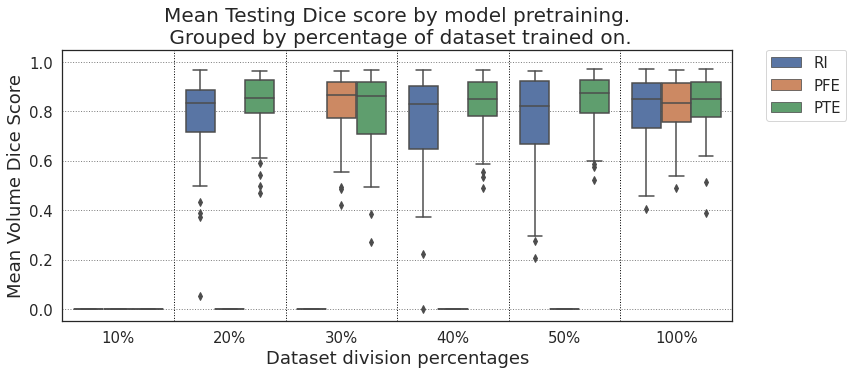

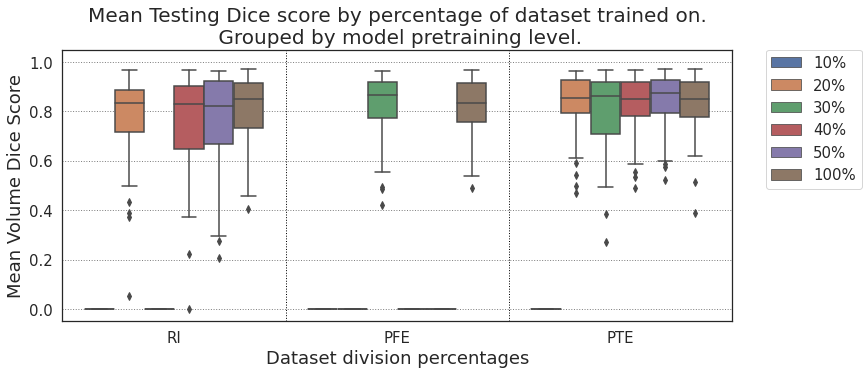

In [5]:
# Segmentation outputs for differing training data size amounts

from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv  

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

slice_count = ["All", "Tumour", "None"]
slice_count_value = 0
epoch = 2

input_1 = "Predictions/MK_6_model_predictions/Division/newDice_RI_10%/step_2_Dice_predictions.csv"
input_2 = "Predictions/MK_6_model_predictions/Division/newDice_RI_20%/step_2_Dice_predictions.csv"
input_3 = "Predictions/MK_6_model_predictions/Division/newDice_RI_30%/step_2_Dice_predictions.csv"
input_4 = "Predictions/MK_6_model_predictions/Division/newDice_RI_40%/step_2_Dice_predictions.csv"
input_5 = "Predictions/MK_6_model_predictions/Division/newDice_RI_50%/step_2_Dice_predictions.csv"
input_6 = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_RI_6/step_2_Dice_predictions.csv"

input_11 = "Predictions/MK_6_model_predictions/Division/newDice_PFE_10%/step_2_Dice_predictions.csv"
input_12 = "Predictions/MK_6_model_predictions/Division/newDice_PFE_20%/step_2_Dice_predictions.csv"
input_13 = "Predictions/MK_6_model_predictions/Division/newDice_PFE_30%/step_2_Dice_predictions.csv"
input_14 = "Predictions/MK_6_model_predictions/Division/newDice_PFE_40%/step_2_Dice_predictions.csv"
input_15 = "Predictions/MK_6_model_predictions/Division/newDice_PFE_50%/step_2_Dice_predictions.csv"
input_16 = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_PFE_6/step_2_Dice_predictions.csv"

input_21 = "Predictions/MK_6_model_predictions/Division/newDice_PTE_10%/step_2_Dice_predictions.csv"
input_22 = "Predictions/MK_6_model_predictions/Division/newDice_PTE_20%/step_2_Dice_predictions.csv"
input_23 = "Predictions/MK_6_model_predictions/Division/newDice_PTE_30%/step_2_Dice_predictions.csv"
input_24 = "Predictions/MK_6_model_predictions/Division/newDice_PTE_40%/step_2_Dice_predictions.csv"
input_25 = "Predictions/MK_6_model_predictions/Division/newDice_PTE_50%/step_2_Dice_predictions.csv"
input_26 = "Predictions/MK_6_model_predictions/25_10_2022/newDice_Test_PTE_6/step_2_Dice_predictions.csv"

title_output_model = ["RI", "PFE", "PTE"]
col_name = ["10%","20%","30%","40%","50%","100%"]
train_data_input = pd.DataFrame(data=None, columns=title_output_model)# .astype(int)

x_array = np.array([])
y_array = np.array([])
z_array = np.array([])
a_array = np.array([])

inputs = [input_1,input_2,input_3,input_4,input_5,input_6]
inputs2 = [input_11,input_12,input_13,input_14,input_15,input_16]
inputs3 = [input_21,input_22,input_23,input_24,input_25,input_26]

index = [0,1,2,3,4,5]
input_test = [inputs, inputs2, inputs3]

for i in range(len(index)):
    x_array = np.array([])
    y_array = np.array([])
    z_array = np.array([])
    with open(input_test[0][index[i]], mode='r') as infile:
        reader = csv.reader(infile)
        mydict = dict((rows[0],rows[1]) for rows in reader)
        for key,val in mydict.items():
            x_array = np.append(x_array,float(val))
            
    with open(input_test[1][index[i]], mode='r') as infile:
        reader = csv.reader(infile)
        mydict = dict((rows[0],rows[1]) for rows in reader)
        for key,val in mydict.items():
            y_array = np.append(y_array,float(val))
            
    with open(input_test[2][index[i]], mode='r') as infile:
        reader = csv.reader(infile)
        mydict = dict((rows[0],rows[1]) for rows in reader)
        for key,val in mydict.items():
            z_array = np.append(z_array,float(val))

    df1 = df = pd.DataFrame(data = {"Division":np.full(len(x_array), col_name[index[i]]),"RI":x_array,"PFE":y_array,"PTE":z_array})
    train_data_input = train_data_input.append(df1,ignore_index=True)

data = train_data_input.melt('Division', var_name='Model Pre-training level', value_name='Mean Dice')
fig = plt.figure(figsize=(12,5))
plt.grid()
ax=sns.boxplot(y='Mean Dice', x='Division', hue='Model Pre-training level', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Testing Dice score by model pretraining.\n Grouped by percentage of dataset trained on."
         ,fontsize=20)
plt.ylim(-0.05,1.05)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.grid(True, which='minor', color='black', lw=1)
plt.xlabel("Dataset division percentages",fontsize=18)
plt.ylabel("Mean Volume Dice Score",fontsize=18)
plt.show()

fig = plt.figure(figsize=(12,5))
plt.grid()
ax=sns.boxplot(y='Mean Dice', x='Model Pre-training level', hue='Division', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Testing Dice score by percentage of dataset trained on.\n Grouped by model pretraining level."
         ,fontsize=20)
plt.ylim(-0.05,1.05)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.grid(True, which='minor', color='black', lw=1)
plt.xlabel("Dataset division percentages",fontsize=18)
plt.ylabel("Mean Volume Dice Score",fontsize=18)
plt.show()

In [ ]:
# # RANO output loss for both training and validation - over differing penalty types

# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme()
# import pandas as pd

# input_names = ["Unet_H16_M14_CO1_R3_main_data_input_4","Unet_H16_M14_CO100_R3_main_data_input_4"]
# legend_names = ["cosine weight 1", "cosine weight 100"]

# output_type = ["validation_loss","training_loss"]
# output_axis = ["MSE loss + cosine loss","MSE loss + cosine loss"]
# output_title = ["validation loss","training loss"]
# second_out = ["Validation_loss","Training_loss"]

# loss_0 = []
# loss_Nan_0 = []

# for c in range(len(output_type)):
#     ax = plt.subplot()
#     for s in range(len(input_names)):
#         for i in range(50):
            
#             loss_0 = np.genfromtxt("Checkpoints_RANO/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
#             loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
#             if c > (len(output_type) - 3):
#                 loss_Nan_0[i] = loss_Nan_0[i]

#         ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
#         loss_0 = []
#         loss_Nan_0 = []

#     plt.title("Mean " + output_title[c] + " per Epoch ",fontsize=14)
#     ax.legend(legend_names,fontsize=11)
#     plt.xlabel("Epoch",fontsize=13)
#     plt.ylabel(ylabel=output_axis[c],fontsize=13)
#     plt.show()    

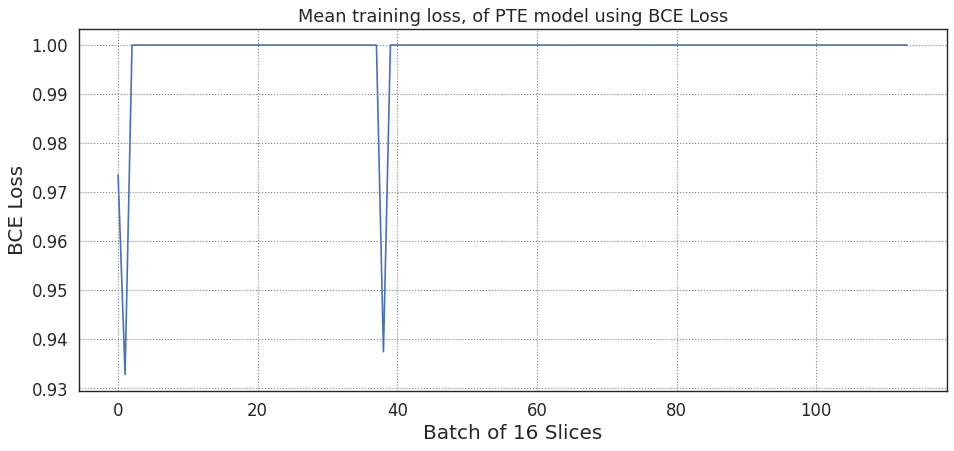

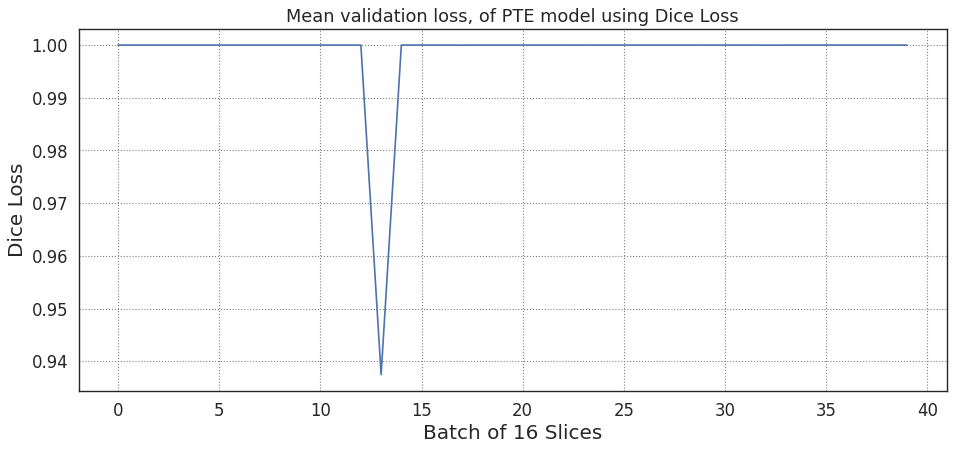

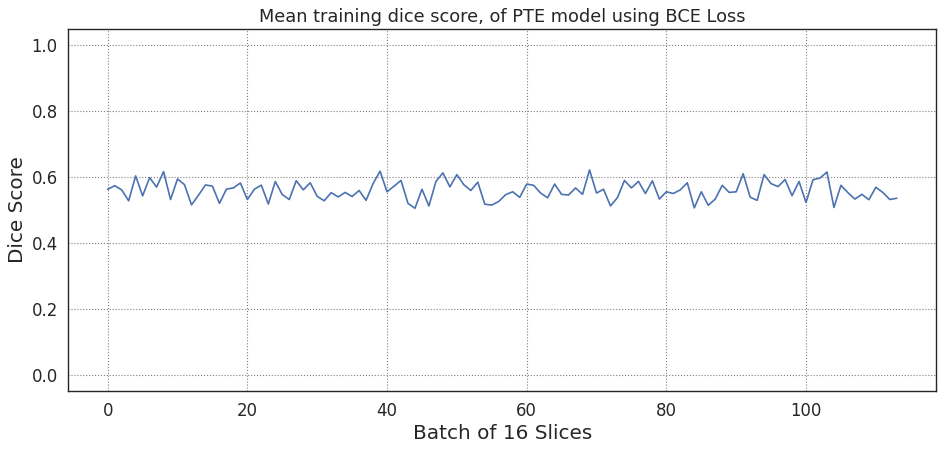

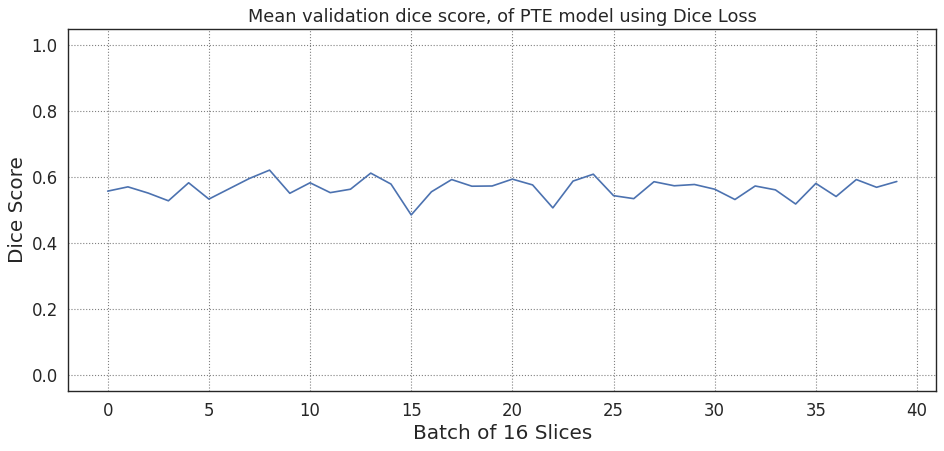

In [107]:
# Segmentation PTE output for 3 different learning rates at orders of magnitude

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

loss_0 = []
loss_1 = []
loss_2 = []
loss_Nan_0 = []
x = 0
loss = []

l_s = ["loss","dice"]
output_l_s = ["loss, ","dice score, "]
b_d = ["BCE Loss", "Dice Loss"]
train_val = [""]
yaxis = ["Dice Loss","Dice Score"]
t_v = ["training", "validation"]

division = 30
model = "RI"

for switch_loss_dice in range(2):
    for switch in range(2):
        input_val = ["Checkpoints/split_data_experiments/"+model+"_division/Full_model_MK6_H16_"+model+"_CO100_R3_lr_0003_dice_main_"+str(division)+"_percent"]
        label_val = ["LR = 0.0003",
                     "LR = 0.00003",
                     "LR = 0.000003"]

        figure(figsize=(14, 6), dpi=80)    
        plt.grid()
        
        for s in range(len(input_val)):

            loss_0 = np.genfromtxt(input_val[s]+"/epoch_0" + t_v[switch] + "_"+l_s[switch_loss_dice]+".csv")
            loss_1 = np.genfromtxt(input_val[s]+"/epoch_1" + t_v[switch] + "_"+l_s[switch_loss_dice]+".csv")
            loss_2 = np.genfromtxt(input_val[s]+"/epoch_2" + t_v[switch] + "_"+l_s[switch_loss_dice]+".csv")

            for i in loss_0:
                loss = np.append(loss,i)
            for i in loss_1:
                loss = np.append(loss,i)
            for i in loss_2:
                loss = np.append(loss,i)

            for i in range(len(loss)):
                x = x + loss[i]
                if i % 16 == 0:
                    loss_Nan_0 = np.append(loss_Nan_0, x / 16)
                    x = 0
            plt.grid()
            plt.plot(range(len(loss_Nan_0[1:])),loss_Nan_0[1:])
            loss = []
            loss_0 = []
            loss_1 = []
            loss_2 = []
            loss_Nan_0 = []
        
        plt.title("Mean "+t_v[switch]+" " + output_l_s[switch_loss_dice] + "of PTE model using " + b_d[switch], fontsize=16)
        if switch_loss_dice == 1:
            plt.ylim([-0.05,1.05])
        plt.xlabel("Batch of 16 Slices", fontsize=18)
        if switch_loss_dice == 0:
            plt.ylabel(b_d[switch], fontsize=18)
        else:
            plt.ylabel("Dice Score", fontsize=18)

        plt.grid()
        plt.show()


(240, 240, 155)


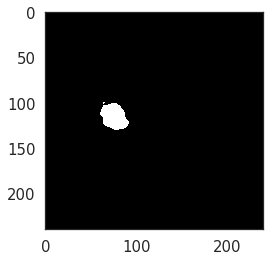

In [114]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
from matplotlib import pyplot as plt

# path1 = "Predictions/MK_6_model_predictions/Division/newDice_RI_30%_3/new/step_0/Non_binary/Brats18_TCIA10_393_1.nii.gz"

path1 = "Predictions/MK_6_model_predictions/Division/newDice_RI_40%/step_0/Brats18_TCIA10_393_1.nii.gz"

slice_val = 65
img = nib.load(path1)
data1 = img.get_fdata()
# data1[:,:,slice_val][ data1[:,:,slice_val]==0 ] = np.nan
print(data1.shape)
plt.imshow(data1[:,:,65], cmap='Greys_r', interpolation='nearest')